## Analisis Exploratorio de datos en 2D

Se crea un análisis exploratorio en dos dimensiones. Esto se hace para ver las **correlaciones**,**covarianzas**,... entre cada variable de los datos.


### 1. Import datos y librerias

In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Hay que cambiar el directorio para escoger "clean_data.csv" el output de el notebook Data_cleaning.ipynb 
directory = "drive/MyDrive/Clases/Estudiantes/Adrian/Dataset/clean_dataset.csv"
df = pd.read_csv(directory)

In [ ]:
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
df = df.drop(columns=["autovalor4","autovalor5"])

Imprimir columnas 

In [ ]:
df.columns

Index(['radio', 'modelo', 'autovalor1', 'autovalor2', 'autovalor3',
       'thickness', 'E', 'nu', 'Caso de carga', 'CC1', 'CC2', 'CC3', 'CC4',
       'autov1', 'autov2', 'autov3"'],
      dtype='object')

### 2. Separar datos Categoricos y Numericos

In [ ]:
df_categorical = df[['Caso de carga',
       'CC1', 'CC2', 'CC3', 'CC4']]

In [ ]:
df_numerical = df[['radio', 'modelo', 'autovalor1', 'autovalor2', 'autovalor3', 'thickness', 'E', 'nu']]

In [ ]:
df_numerical

,radio,modelo,autovalor1,autovalor2,autovalor3,thickness,E,nu
0,0.0,1,"0,0362","0,0411","0,0546","0,1",71700,"0,33"
1,0.0,1,"0,0548","0,0622","0,0827","0,1",110000,"0,31"
2,0.0,1,"0,0972","0,11038","0,14681","0,1",200000,"0,27"
3,0.0,1,"0,0725","0,0823","0,10952","0,1",150000,"0,26"
4,0.0,1,"0,023","0,0262","0,0348","0,1",45000,"0,35"
...,...,...,...,...,...,...,...,...
11993,25.0,400,"300,28","-300,65","-2173,7",5,71700,"0,33"
11994,25.0,400,"466,12","-466,7","-3336,9",5,110000,"0,31"
11995,25.0,400,868,"-869,1","-6080,9",5,200000,"0,27"
11996,25.0,400,"654,97","-655,8","-4564,2",5,150000,"0,26"


### 3. Pre-procesamiento de datos Categoricos

**3.1** datos categoricos a *One-hot encoding*

In [ ]:
df_categorical_preprocessed = df_categorical
for column in df_categorical:
    dummy = pd.get_dummies(df_categorical[column],prefix=column)
    df_categorical_preprocessed = df_categorical_preprocessed.drop(column,axis=1)
    df_categorical_preprocessed = pd.concat([df_categorical_preprocessed,dummy],axis=1)

In [ ]:
df_categorical

,Caso de carga,CC1,CC2,CC3,CC4
0,X,SS,SS,SS,SS
1,X,SS,SS,SS,SS
2,X,SS,SS,SS,SS
3,X,SS,SS,SS,SS
4,X,SS,SS,SS,SS
...,...,...,...,...,...
11993,XY,F,SS,F,SS
11994,XY,F,SS,F,SS
11995,XY,F,SS,F,SS
11996,XY,F,SS,F,SS


In [ ]:
df_categorical_preprocessed

,Caso de carga_X,Caso de carga_X+Y,Caso de carga_XY,Caso de carga_Y,CC1_F,CC1_SS,CC2_F,CC2_SS,CC3_F,CC3_SS,CC4_C,CC4_F,CC4_SS
0,1,0,0,0,0,1,0,1,0,1,0,0,1
1,1,0,0,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,0,1,0,1,0,1,0,0,1
3,1,0,0,0,0,1,0,1,0,1,0,0,1
4,1,0,0,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,0,0,1,0,1,0,0,1,1,0,0,0,1
11994,0,0,1,0,1,0,0,1,1,0,0,0,1
11995,0,0,1,0,1,0,0,1,1,0,0,0,1
11996,0,0,1,0,1,0,0,1,1,0,0,0,1


### 4. Pre-procesamiento de datos numericos

**4.1** Escalar datos usando el escalador **Min-Max Scaler**

In [ ]:
df_numerical

,radio,modelo,autovalor1,autovalor2,autovalor3,thickness,E,nu
0,0.0,1,"0,0362","0,0411","0,0546","0,1",71700,"0,33"
1,0.0,1,"0,0548","0,0622","0,0827","0,1",110000,"0,31"
2,0.0,1,"0,0972","0,11038","0,14681","0,1",200000,"0,27"
3,0.0,1,"0,0725","0,0823","0,10952","0,1",150000,"0,26"
4,0.0,1,"0,023","0,0262","0,0348","0,1",45000,"0,35"
...,...,...,...,...,...,...,...,...
11993,25.0,400,"300,28","-300,65","-2173,7",5,71700,"0,33"
11994,25.0,400,"466,12","-466,7","-3336,9",5,110000,"0,31"
11995,25.0,400,868,"-869,1","-6080,9",5,200000,"0,27"
11996,25.0,400,"654,97","-655,8","-4564,2",5,150000,"0,26"


In [ ]:
df_numerical['thickness'] = df_numerical['thickness'].str.replace(",",".") 
df_numerical['autovalor1'] = df_numerical['autovalor1'].str.replace(",",".") 
df_numerical['autovalor2'] = df_numerical['autovalor2'].str.replace(",",".") 
df_numerical['autovalor3'] = df_numerical['autovalor3'].str.replace(",",".") 
df_numerical['nu'] = df_numerical['nu'].str.replace(",",".") 

df_numerical['thickness']  = df_numerical['thickness'] .astype(float)
df_numerical['thickness'] = df_numerical['thickness'].astype(float)
df_numerical['autovalor1'] = df_numerical['autovalor1'].astype(float)
df_numerical['autovalor2'] = df_numerical['autovalor2'].astype(float)
df_numerical['autovalor3'] = df_numerical['autovalor3'].astype(float)
df_numerical['nu'] = df_numerical['nu'].astype(float)

AttributeError: ignored

In [ ]:
df_numerical

,radio,modelo,autovalor1,autovalor2,autovalor3,thickness,E,nu
0,0.0,1,0.0362,0.0411,0.0546,0.1,71700,0.33
1,0.0,1,0.0548,0.0622,0.0827,0.1,110000,0.31
2,0.0,1,0.0972,0.11038,0.14681,0.1,200000,0.27
3,0.0,1,0.0725,0.0823,0.10952,0.1,150000,0.26
4,0.0,1,0.023,0.0262,0.0348,0.1,45000,0.35
...,...,...,...,...,...,...,...,...
11993,25.0,400,300.28,-300.65,-2173.7,5.0,71700,0.33
11994,25.0,400,466.12,-466.7,-3336.9,5.0,110000,0.31
11995,25.0,400,868,-869.1,-6080.9,5.0,200000,0.27
11996,25.0,400,654.97,-655.8,-4564.2,5.0,150000,0.26


In [ ]:
#Escalar Datos
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
y = ["autovalor1","autovalor2","autovalor3"]
X = scaler.fit_transform(df_numerical.drop(y, axis=1))

df_numerical_preprocessed= pd.DataFrame(X, columns=df_numerical.drop(y, axis=1).columns, index=df_numerical.index)


In [ ]:
df_numerical_preprocessed

,radio,modelo,thickness,E,nu
0,0.0,0.0,0.0,0.172258,0.777778
1,0.0,0.0,0.0,0.419355,0.555556
2,0.0,0.0,0.0,1.000000,0.111111
3,0.0,0.0,0.0,0.677419,0.000000
4,0.0,0.0,0.0,0.000000,1.000000
...,...,...,...,...,...
11993,1.0,1.0,1.0,0.172258,0.777778
11994,1.0,1.0,1.0,0.419355,0.555556
11995,1.0,1.0,1.0,1.000000,0.111111
11996,1.0,1.0,1.0,0.677419,0.000000


**4.2** Quitar Outliers usando la tecnica del IQR

In [ ]:
Q1 = df_numerical_preprocessed.quantile(0.25)
Q3 = df_numerical_preprocessed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

radio        0.600000
modelo       0.500627
thickness    0.510204
E            0.505161
nu           0.666667
dtype: float64


In [ ]:
out_param = 1.5

In [ ]:
df_numerical_preprocessed = df_numerical_preprocessed[~ !(X(df_numerical_preprocessed < (Q1 - out_param * IQR)) |(df_numerical_preprocessed > (Q3 + out_param * IQR)))]
df_numerical_preprocessed.shape

SyntaxError: ignored

In [ ]:
df_numerical_preprocessed

,radio,modelo,thickness,E,nu
0,0.0,0.0,0.0,0.172258,0.777778
1,0.0,0.0,0.0,0.419355,0.555556
2,0.0,0.0,0.0,1.000000,0.111111
3,0.0,0.0,0.0,0.677419,0.000000
4,0.0,0.0,0.0,0.000000,1.000000
...,...,...,...,...,...
11993,1.0,1.0,1.0,0.172258,0.777778
11994,1.0,1.0,1.0,0.419355,0.555556
11995,1.0,1.0,1.0,1.000000,0.111111
11996,1.0,1.0,1.0,0.677419,0.000000


In [ ]:
df_preprocessed = pd.concat([df_numerical_preprocessed,df_categorical_preprocessed,df[y]],axis=1)

In [ ]:
df_preprocessed = df_preprocessed.dropna()

### 5. Observar Distribuciones

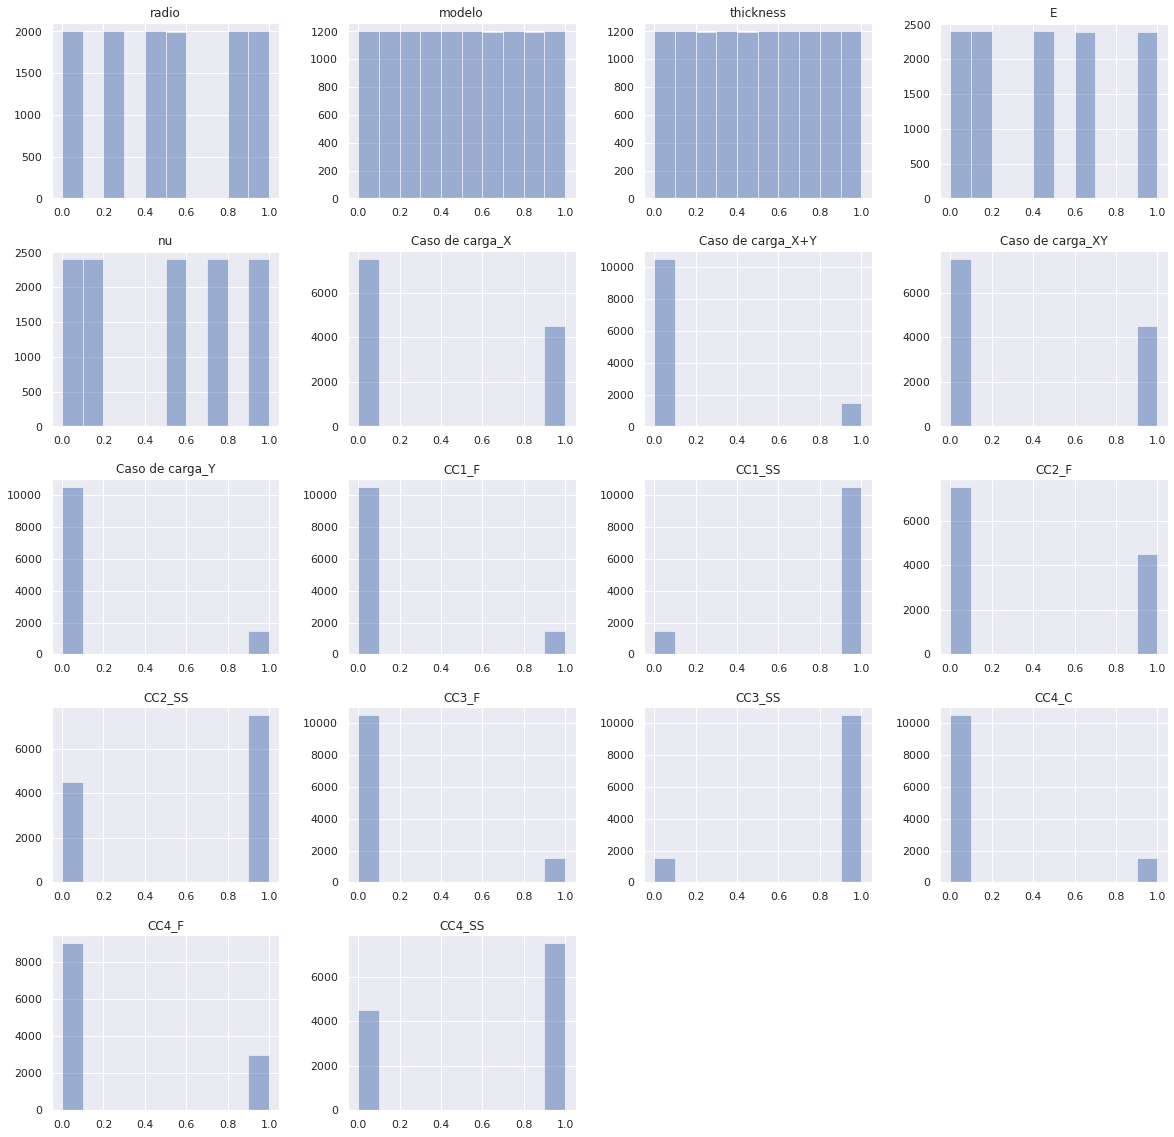

In [ ]:
# Plotting the histograms of each variable
from matplotlib import pyplot
df_preprocessed.hist(alpha=0.5, figsize=(20, 20))
pyplot.show()



*   En los datos categoricos estan codificados.
*   En los datos numericos, los outliers se han quitado.

* En los datos numericos, los outliers se han quitado.

Pese a esto las distribuciones no son "gaussianas", esto muestra que una **regresion lineal** no sera el mejor modelo.


In [ ]:
df

###6. Multicolinealidad

La multicolinealidad es la relación de dependencia lineal fuerte entre más de dos variables. Esto es perjudicial tanto para la regresión lineal como para las redes neuronales. Entonces tendremos que quitarlo.

Text(0.5, 1.0, 'pearson correlation')

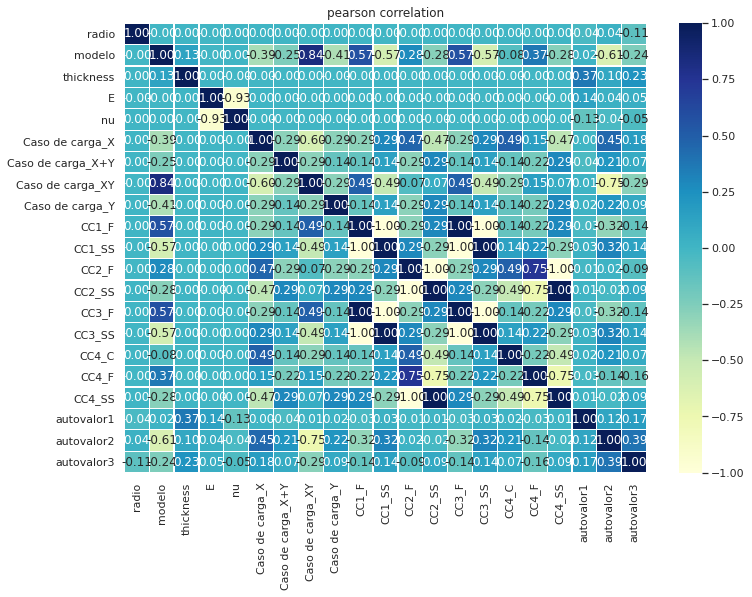

In [ ]:
#Seleccion de datos


corr_matrix = df_preprocessed.copy()

for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
            
corr_matrix = corr_matrix.corr(method="pearson")
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.02f', cmap="YlGnBu", cbar=True, linewidths=0.2 )
plt.title("pearson correlation")

A pesar de poder dibujar el diagrama hay que quitar los valores y:


*   autovalor1
*   autovalor2
*   autovalor3



In [ ]:
lista_quitar  = ["autovalor1","autovalor2","autovalor3"]
df_multicolinealidad = df_preprocessed.drop(lista_quitar,axis=1)

Hay que quitar la **duplica** de los valores dejandonos un diagrama triangular

Text(0.5, 1.0, 'pearson correlation')

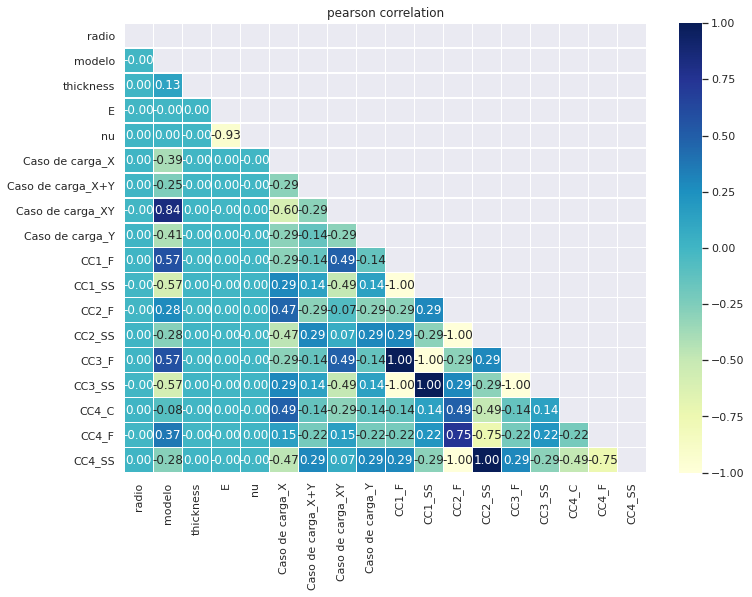

In [ ]:

corr_matrix = df_multicolinealidad.copy()

for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
             
corr_matrix = corr_matrix.corr(method="pearson")
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(corr_matrix)] = True
sns.set(rc={'figure.figsize':(11.7,8.27)})

core= sns.heatmap(corr_matrix, mask=mask,vmin=-1., vmax=1., annot=True, fmt='.02f', cmap="YlGnBu", cbar=True, linewidths=0.2 , square= False)
plt.title("pearson correlation")

Hay que escoger los valores que tengan una **multicolinealidad** de menos del 70%, esto es un hiperparametro y se puede cambiar.

In [ ]:
multico = 0.7

Text(0.5, 1.0, 'pearson correlation')

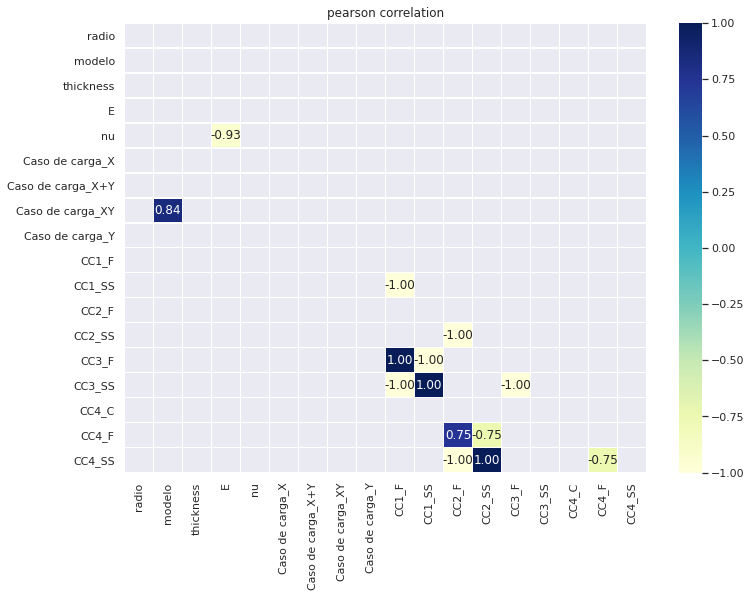

In [ ]:

corr_matrix = corr_matrix[(corr_matrix>multico) |  (corr_matrix < -multico)]

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(corr_matrix)] = True
sns.set(rc={'figure.figsize':(11.7,8.27)})

core= sns.heatmap(corr_matrix, mask=mask,vmin=-1., vmax=1., annot=True, fmt='.02f', cmap="YlGnBu", cbar=True, linewidths=0.2 , square= False)
plt.title("pearson correlation")

In [ ]:
corr_matrix

,radio,modelo,thickness,E,nu,Caso de carga_X,Caso de carga_X+Y,Caso de carga_XY,Caso de carga_Y,CC1_F,CC1_SS,CC2_F,CC2_SS,CC3_F,CC3_SS,CC4_C,CC4_F,CC4_SS
radio,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelo,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.838521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thickness,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,1.000000,-0.926807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nu,NaN,NaN,NaN,-0.926807,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_X,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_X+Y,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_XY,NaN,0.838521,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC1_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,1.0,-1.0,NaN,NaN,NaN


In [ ]:
corr_matrix_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(np.bool))

In [ ]:
corr_matrix_triangle

,radio,modelo,thickness,E,nu,Caso de carga_X,Caso de carga_X+Y,Caso de carga_XY,Caso de carga_Y,CC1_F,CC1_SS,CC2_F,CC2_SS,CC3_F,CC3_SS,CC4_C,CC4_F,CC4_SS
radio,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelo,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.838521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thickness,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,1.0,-0.926807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nu,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_X,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_X+Y,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_XY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC1_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-1.0,NaN,NaN,1.0,-1.0,NaN,NaN,NaN


In [ ]:
np.fill_diagonal(corr_matrix_triangle.values, float("NaN"))

In [ ]:
corr_matrix_triangle

,radio,modelo,thickness,E,nu,Caso de carga_X,Caso de carga_X+Y,Caso de carga_XY,Caso de carga_Y,CC1_F,CC1_SS,CC2_F,CC2_SS,CC3_F,CC3_SS,CC4_C,CC4_F,CC4_SS
radio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modelo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.838521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thickness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,-0.926807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_X+Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_XY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Caso de carga_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CC1_F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,1.0,-1.0,NaN,NaN,NaN


In [ ]:
corr_matrix_triangle = corr_matrix_triangle.stack().reset_index()
corr_matrix_triangle.columns = ['Row','Column','Value']

In [ ]:
corr_matrix_triangle

,Row,Column,Value
0,modelo,Caso de carga_XY,0.838521
1,E,nu,-0.926807
2,CC1_F,CC1_SS,-1.000000
3,CC1_F,CC3_F,1.000000
4,CC1_F,CC3_SS,-1.000000
5,CC1_SS,CC3_F,-1.000000
6,CC1_SS,CC3_SS,1.000000
7,CC2_F,CC2_SS,-1.000000
8,CC2_F,CC4_F,0.745306
9,CC2_F,CC4_SS,-1.000000


In [ ]:
lista_columnas = corr_matrix_triangle["Row"]

In [ ]:
lista_columnas = lista_columnas.to_numpy()

In [ ]:
df_multicolinealidad = df_multicolinealidad.drop(lista_columnas,axis=1)

Aqui podemos ver las columnas restantes despues de quitar las columnas con **multicolinealidad** de mas del 70%

Text(0.5, 1.0, 'pearson correlation')

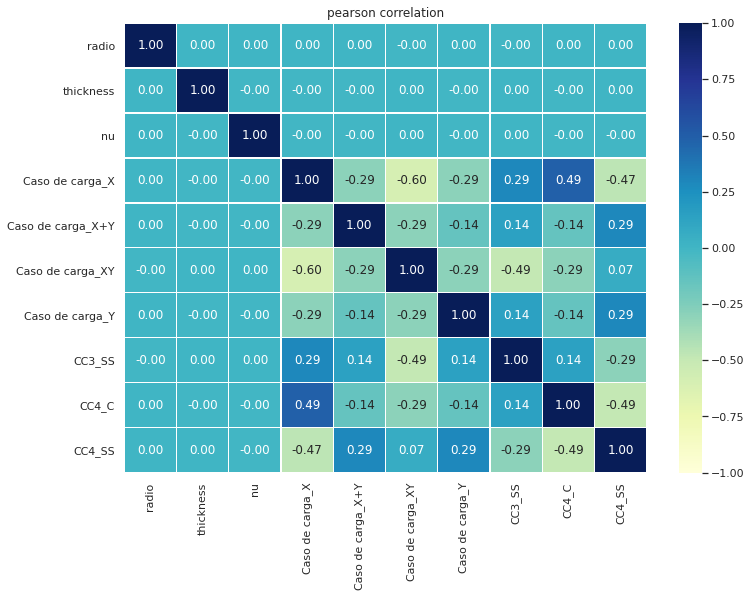

In [ ]:

corr_matrix = df_multicolinealidad

for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
            
corr_matrix = corr_matrix.corr(method="pearson")
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(corr_matrix)] = True
sns.set(rc={'figure.figsize':(11.7,8.27)})

core= sns.heatmap(corr_matrix,vmin=-1., vmax=1., annot=True, fmt='.02f', cmap="YlGnBu", cbar=True, linewidths=0.2 , square= False)
plt.title("pearson correlation")

###7. Ver importancia de variables

Hay muchas categorias, esto puede ser perjudicial para la visualización, y modelos de predicción.

In [ ]:
y = ["autovalor1","autovalor2","autovalor3"]

In [ ]:
#BANCO_S quitar
#CANAL_CR quitar

#Regularizacion lasso, ANOVA

y = ["autovalor1","autovalor2","autovalor3"]
X = df_multicolinealidad.apply(lambda x: x.replace(',','.'))
dtf = pd.concat([df_multicolinealidad,df[y].apply(lambda x: x.str.replace(',','.'))],axis=1)
dtf= dtf.dropna()
y = dtf[y].values


In [ ]:
dtf

,radio,thickness,nu,Caso de carga_X,Caso de carga_X+Y,Caso de carga_XY,Caso de carga_Y,CC3_SS,CC4_C,CC4_SS,autovalor1,autovalor2,autovalor3
0,0.0,0.0,0.777778,1,0,0,0,1,0,1,0.0362,0.0411,0.0546
1,0.0,0.0,0.555556,1,0,0,0,1,0,1,0.0548,0.0622,0.0827
2,0.0,0.0,0.111111,1,0,0,0,1,0,1,0.0972,0.11038,0.14681
3,0.0,0.0,0.000000,1,0,0,0,1,0,1,0.0725,0.0823,0.10952
4,0.0,0.0,1.000000,1,0,0,0,1,0,1,0.023,0.0262,0.0348
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11993,1.0,1.0,0.777778,0,0,1,0,0,0,1,300.28,-300.65,-2173.7
11994,1.0,1.0,0.555556,0,0,1,0,0,0,1,466.12,-466.7,-3336.9
11995,1.0,1.0,0.111111,0,0,1,0,0,0,1,868,-869.1,-6080.9
11996,1.0,1.0,0.000000,0,0,1,0,0,0,1,654.97,-655.8,-4564.2


In [ ]:
print(y)

[['0.0362' '0.0411' '0.0546']
 ['0.0548' '0.0622' '0.0827']
 ['0.0972' '0.11038' '0.14681']
 ...
 ['868' '-869.1' '-6080.9']
 ['654.97' '-655.8' '-4564.2']
 ['186.29' '-186.52' '-1363.9']]


In [ ]:
X

,radio,thickness,nu,Caso de carga_X,Caso de carga_X+Y,Caso de carga_XY,Caso de carga_Y,CC3_SS,CC4_C,CC4_SS
0,0.0,0.0,0.777778,1,0,0,0,1,0,1
1,0.0,0.0,0.555556,1,0,0,0,1,0,1
2,0.0,0.0,0.111111,1,0,0,0,1,0,1
3,0.0,0.0,0.000000,1,0,0,0,1,0,1
4,0.0,0.0,1.000000,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
11993,1.0,1.0,0.777778,0,0,1,0,0,0,1
11994,1.0,1.0,0.555556,0,0,1,0,0,0,1
11995,1.0,1.0,0.111111,0,0,1,0,0,0,1
11996,1.0,1.0,0.000000,0,0,1,0,0,0,1


Aplicamos un modelo  ** Regresion de arboles aleatorios ** para ver la importancia de los valores

Index(['radio', 'thickness', 'nu', 'Caso de carga_X', 'Caso de carga_X+Y',
       'Caso de carga_XY', 'Caso de carga_Y', 'CC3_SS', 'CC4_C', 'CC4_SS'],
      dtype='object')


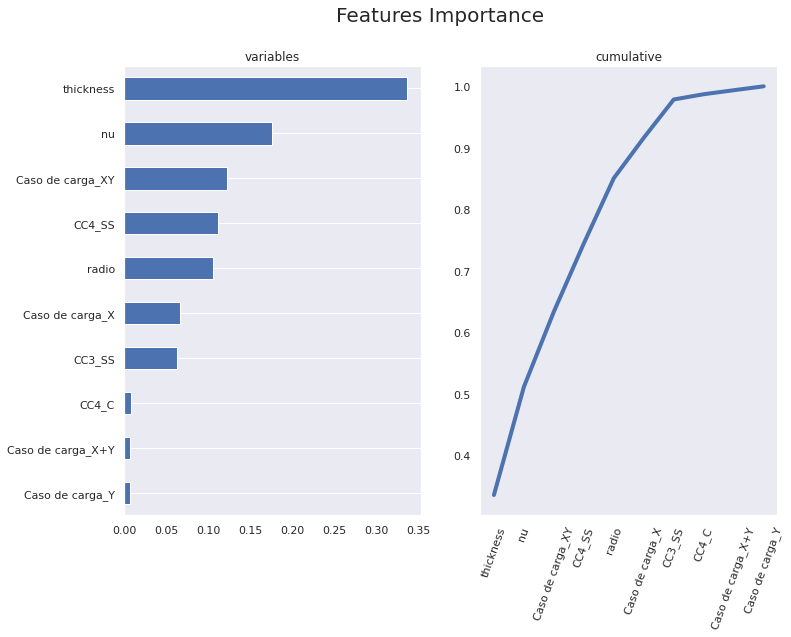

In [ ]:
model = ensemble.RandomForestRegressor(n_estimators=100, criterion="mse", random_state = 0)
model.fit(X,y)

model.feature_importances_

#Metodo de arboles aleatorios
feature_names = dtf.drop(["autovalor1","autovalor2","autovalor3"], axis=1).columns

print(feature_names)

feature_names = feature_names.tolist()

importances = model.feature_importances_

dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)

dtf_importances

dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")


ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

Aqui vemos que hay un alto numero de variables que no llegan a tener una importancia de el 10%, podemos quitar estas variables para mejorar los modelos de predicción.

###8. Exportación de datos para la regresion y Red Neuronal

Aqui quitarmeos las columnas con menos importancia.

In [ ]:
columnas_drop = dtf_importances.iloc[7:].T.columns

In [ ]:
columnas_drop

Index(['CC4_C', 'Caso de carga_X+Y', 'Caso de carga_Y'], dtype='object', name='VARIABLE')

In [ ]:
df_output = df_preprocessed.drop(columns=columnas_drop)
df_output.to_csv("drive/MyDrive/Clases/Estudiantes/Adrian/Dataset/df_input_modelo.csv")